In [108]:
import skvideo.io
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

video = np.array(skvideo.io.vread("Rolling.png"))


# #input video is in format [frame, y, x, (r, g, b)] (starting from left top as 0, 0)
# def video_RGB_to_YCbCr(rbgvideo):
    
    
#     frames = rbgvideo.shape[0]
#     height = rbgvideo.shape[1]
#     width = rbgvideo.shape[2]
#     YCbCr_video = np.zeros(rbgvideo.shape)
    
    
#     for k in range(frames):
#         for j in range(height):
#             for i in range(width):
#                 Y,Cb,Cr = RGBpixelconverter(rbgvideo[k,j,i,:])
#                 YCbCr_video[k,j,i,0] = Y
#                 YCbCr_video[k,j,i,1] = Cb
#                 YCbCr_video[k,j,i,2] = Cr
            
#     return YCbCr_video

# #input video is in format [frame, y, x, (r, g, b)] (starting from left top as 0, 0)
# def video_YCbCr_to_RGB(YCbCr_video):
    
    
#     frames = YCbCr_video.shape[0]
#     height = YCbCr_video.shape[1]
#     width = YCbCr_video.shape[2]
#     rgb_video = np.zeros(YCbCr_video.shape)
    
    
#     for k in range(frames):
#         for j in range(height):
#             for i in range(width):
#                 R,G,B = YCbCrpixelconverte(YCbCr_video[k,j,i,:])
#                 rgb_video[k,j,i,0] = R
#                 rgb_video[k,j,i,1] = G
#                 rgb_video[k,j,i,2] = B
            
#     return rgb_video

# def RGBpixelconverter(pixel):
#     r, g, b = pixel[0], pixel[1], pixel[2]
    
#     Y = 0.299 * r + 0.587 * g + 0.114 * b
#     Cb = -0.169 * r - 0.331 * g + 0.5 * b
#     Cr = 0.5 * r - 0.419 * g - 0.081 * b

#     return [round(Y), round(Cb), round(Cr)]

# def YCbCrpixelconverter(pixel):
#     Y, Cb, Cr = pixel[0], pixel[1], pixel[2]
    
#     r = Y + 1.402  * Cr
#     g = Y - 0.344 * Cb - 0.714 * Cr
#     b = Y + 1.772 * Cb
    
#     return [round(r), round(g), round(b)]



#fix these, these are copied
def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    return np.uint8(rgb)



In [109]:
def video_RGB_to_YCbCr(rbgvideo):
    
    frames = rbgvideo.shape[0]

    YCbCr_video = np.zeros(rbgvideo.shape)
    
    
    for k in range(frames):
        YCbCr_video[k,:,:,:]  = rgb2ycbcr(rbgvideo[k,:,:,:])

            
    return YCbCr_video

def video_YCbCr_to_RGB(YCbCr_video):
    
    frames = YCbCr_video.shape[0]

    rgb_video = np.zeros(YCbCr_video.shape)
    
    
    for k in range(frames):
        rgb_video[k,:,:,:]  = ycbcr2rgb(YCbCr_video[k,:,:,:])

            
    return rgb_video




preproc = video_RGB_to_YCbCr(video)


(13, 42, 52, 3)


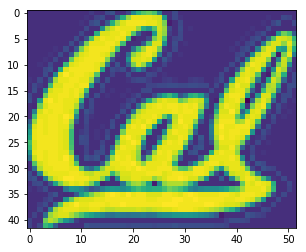

In [110]:
plt.imshow(preproc[0,:,:,2])
print(preproc.shape)

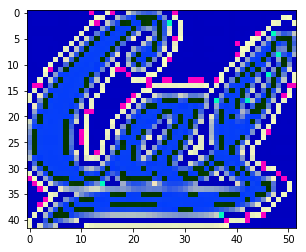

In [115]:
og = video_YCbCr_to_RGB(preproc)
plt.imshow(og[0,:,:,:])

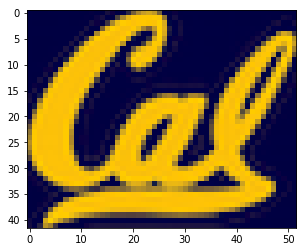

In [112]:
plt.imshow(video[0,:,:,:])

In [119]:
def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float)
    rgb[:,:,[1,2]] -= 128
    return np.uint8(rgb.dot(xform.T))

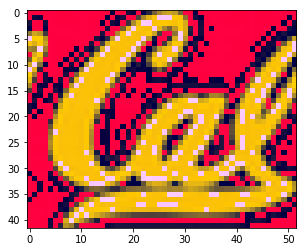

In [120]:
plt.imshow(ycbcr2rgb(rgb2ycbcr(video[1,:,:,:])))